In [6]:
import numpy as np
import pandas as pd

In [7]:
path='../data/'
list_path= path+'driver_imgs_list.csv'
print(list_path)
image_dataset = pd.read_csv(list_path)

../data/driver_imgs_list.csv


In [8]:
image_dataset.head()


,subject,classname,img
0,p002,c0,img_44733.jpg
1,p002,c0,img_72999.jpg
2,p002,c0,img_25094.jpg
3,p002,c0,img_69092.jpg
4,p002,c0,img_92629.jpg


In [9]:
x=image_dataset['img']
y=image_dataset['classname']

In [10]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x,y,test_size = 0.20,train_size =0.80,random_state=43)

In [11]:
type(x_train)
y_val.size

4485

In [12]:
import os
import shutil
for i in range(0,x_train.size):
    cr_path ='../train/' + y_train.iloc[i] + '/'
    if (not os.path.exists(cr_path)):
        os.makedirs(cr_path)
    shutil.copyfile('../data/imgs/train/' + y_train.iloc[i] + '/' + x_train.iloc[i], '../train/' + y_train.iloc[i] + '/' + x_train.iloc[i])


In [13]:
for i in range(0,x_val.size):
    cr_path ='../validation/' + y_val.iloc[i] + '/'
    if (not os.path.exists(cr_path)):
        os.makedirs(cr_path)
    shutil.copyfile('../data/imgs/train/' + y_val.iloc[i] + '/' + x_val.iloc[i], '../validation/' + y_val.iloc[i] + '/' + x_val.iloc[i])


In [14]:
from keras.preprocessing.image import ImageDataGenerator
image_data_generator=ImageDataGenerator(
                        rescale=1./255,
                        shear_range=0.2,
                        zoom_range=0.2,
                        horizontal_flip=True)

In [15]:
train_generator = image_data_generator.flow_from_directory(
        '../train',
        target_size=(32, 32),
        batch_size=32,
        class_mode='categorical')

Found 17939 images belonging to 10 classes.


In [16]:
test_datagenerator = ImageDataGenerator(rescale=1./255)
validation_generator = test_datagenerator.flow_from_directory(
        '../validation',
        target_size=(32, 32),
        batch_size=32,
        class_mode='categorical')

Found 4485 images belonging to 10 classes.


In [17]:
from keras.models import Sequential
from keras import regularizers, optimizers
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=(32,32,3)))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
model.compile(optimizers.rmsprop(lr=0.0001, decay=1e-6),loss="categorical_crossentropy",metrics=["accuracy"])

In [18]:
steps_per_epoch_array = [100,200,300,1000,2000]
epochs_array = [10,20,30,40,50]
validation_steps_array=[100,200,300,400,800]
history=model.fit_generator(
        train_generator,
        steps_per_epoch=steps_per_epoch_array[4],
        epochs=epochs_array[0],
        validation_data=validation_generator,
        validation_steps=validation_steps_array[4])

Epoch 1/10
2000/2000 [==============================] - 552s 276ms/step - loss: 1.8597 - acc: 0.3257 - val_loss: 1.1298 - val_acc: 0.6567
Epoch 2/10
2000/2000 [==============================] - 560s 280ms/step - loss: 1.1099 - acc: 0.6163 - val_loss: 0.5574 - val_acc: 0.8391
Epoch 3/10
2000/2000 [==============================] - 521s 260ms/step - loss: 0.7396 - acc: 0.7499 - val_loss: 0.3312 - val_acc: 0.9180
Epoch 4/10
2000/2000 [==============================] - 503s 252ms/step - loss: 0.5622 - acc: 0.8160 - val_loss: 0.2393 - val_acc: 0.9381
Epoch 5/10
2000/2000 [==============================] - 515s 258ms/step - loss: 0.4541 - acc: 0.8545 - val_loss: 0.1992 - val_acc: 0.9494
Epoch 6/10
2000/2000 [==============================] - 732s 366ms/step - loss: 0.3848 - acc: 0.8788 - val_loss: 0.1506 - val_acc: 0.9664
Epoch 7/10
2000/2000 [==============================] - 538s 269ms/step - loss: 0.3450 - acc: 0.8914 - val_loss: 0.1379 - val_acc: 0.9655
Epoch 8/10
2000/2000 [============

In [22]:
model.metrics_names
result=model.evaluate_generator(generator=validation_generator,steps=4485)

In [23]:
print("Model loss is %f accuracy is %f "%(result[0],result[1]))

Model loss is 0.112350 accuracy is 0.975094 


dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


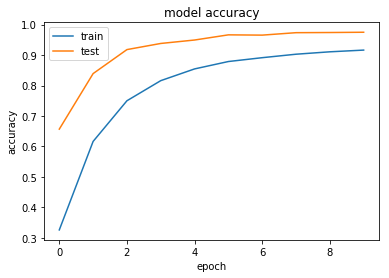

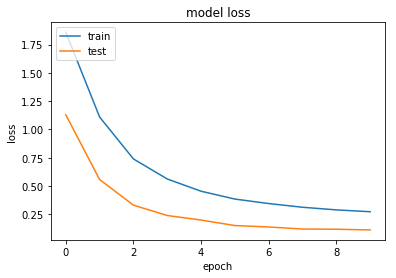

In [21]:
import matplotlib.pyplot as plt
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [24]:
from keras.models import load_model

model.save('model_using_keras.h5')


In [2]:
from keras.models import load_model

s_model = load_model('model_using_keras.h5')

/Users/manishashivshette/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [26]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications import imagenet_utils

path = "../data/imgs/test/img_1.jpg"
image = load_img(path, target_size=(32,32))

image_arr = img_to_array(image) # convert from PIL Image to NumPy array
# the dimensions of image should now be (150, 150, 3)

# to be able to pass it through the network and use batches, we want it with shape (1, 150, 150, 3)
image_arr = np.expand_dims(image_arr, axis=0)
print(image_arr.shape)

image_arr /= 255

(1, 32, 32, 3)


In [27]:
prediction_array = s_model.predict(image_arr)
print(prediction_array)

[[1.3718130e-07 1.0541603e-09 1.7206160e-07 6.9586036e-08 1.5577081e-08
  9.9999952e-01 9.3958441e-09 7.6260044e-08 5.5912242e-08 1.5425819e-08]]


In [28]:
answer = np.argmax(prediction_array)
print(answer)

5


In [29]:
def get_prediction_class(answer):  
    if answer == 0:
        result="c0"
    elif answer == 1:
        result="c1"
    elif answer == 2:
        result="c2"
    elif answer == 3:
        result="c3"
    elif answer == 4:
        result="c4"
    elif answer == 5:
        result="c5"
    elif answer == 6:
        result="c6"
    elif answer == 7:
        result="c7"
    elif answer == 8:
        result="c8"
    elif answer == 9:
        result="c9"
    return result


In [30]:
val_array = []
for i in range(0,x_val.size):
    image_path ='../validation/' + y_val.iloc[i] + '/' + x_val.iloc[i]
    image = load_img(image_path, target_size=(32,32))

    image_arr = img_to_array(image) 

    image_arr = np.expand_dims(image_arr, axis=0)
    image_arr /= 255
    prediction_array = s_model.predict(image_arr)
    answer = np.argmax(prediction_array)
    answer = get_prediction_class(answer)
    val_array.append(answer)

In [31]:
print(len(val_array))
print(y_val[0:5])
print(val_array[0:5])

4485
18393    c7
21337    c6
19448    c0
12949    c3
3984     c6
Name: classname, dtype: object
['c7', 'c6', 'c0', 'c3', 'c6']


In [33]:
from sklearn import metrics
print("accuracy of model:",metrics.accuracy_score(y_val,val_array))

accuracy of model: 0.979933110367893
